In [1]:
from PIL import Image
import pytesseract
from pytesseract import Output
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import textdistance

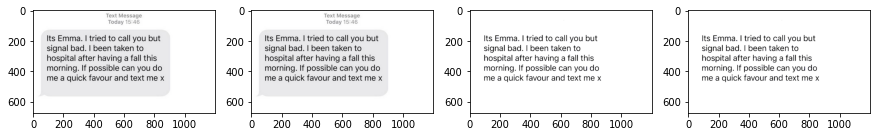

In [32]:
filename = '/Users/Joe/Docs/mycode/myPython/OCR/tests/test01.jpeg'

#img = cv2.imread(filename)
img = np.array(Image.open(filename))
imgOg = img

noiseReduction = True

if noiseReduction:
    norm_img = np.zeros((img.shape[0], img.shape[1]))
    img2 = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
    img3 = cv2.threshold(img2, 100, 255, cv2.THRESH_BINARY)[1]
    #img3 = cv2.threshold(img2, 5, 255, cv2.THRESH_BINARY)[1]
    img4 = cv2.GaussianBlur(img3, (1, 1), 0)

    plt.figure(figsize=(15,5))
    plt.subplot(1,4,1)
    plt.imshow(img)
    plt.subplot(1,4,2)
    plt.imshow(img2)
    plt.subplot(1,4,3)
    plt.imshow(img3)
    plt.subplot(1,4,4)
    plt.imshow(img4)

    img = img4

In [33]:
# Using Image to String

#text = pytesseract.image_to_string(img)                    # English
#text = pytesseract.image_to_string(img, lang="spa")        # Spanish
#text = pytesseract.image_to_string(img, lang="eng+spa")    # Spanish and English

#print(' '.join(text.splitlines()))

# Using Image to data

results = pytesseract.image_to_data(img, lang="eng+spa", output_type=Output.DICT)
#pytesseract.get_languages()

In [34]:
for i in range(0, len(results["text"])):
    x = results["left"][i]
    y = results["top"][i]
    
    w = results["width"][i]
    h = results["height"][i]
    text = results["text"][i]
    conf = int(float(results["conf"][i]))
    
    if conf > 70:
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

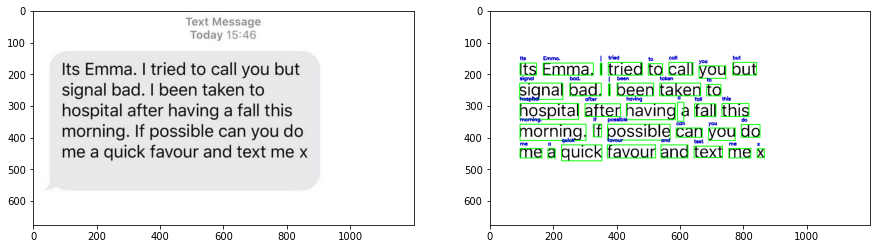

In [35]:
#cv2.imshow(image)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(imgOg)
plt.subplot(1,2,2)
plt.imshow(img)

In [39]:
plt.imsave("../../tests/test01out.jpeg", img)

In [36]:
# ' '.join(results['text'])             # Print with empty chars
predY = ' '.join([ r for r in results['text'] if r != ''])
print(predY)

testY = '¿QUE ES LA LEY DE OFERTA Y DEMANDA? La ley de la oferta y la demanda es el principio basico sobre el que se basa una economia de mercado. Este principio refleja la relación que existe entre la demanda de un producto y la cantidad ofrecida de ese producto teniendo en cuenta el precio al que se vende el producto.'

print(textdistance.hamming(testY, predY))

Its Emma. | tried to call you but signal bad. | been taken to hospital after having a fall this morning. If possible can you do me a quick favour and text me x
300
